Setup

In [1]:
!pip install -r ../requirements.txt
import visualising_poetry as vp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
import seaborn as sn
vp.setup_if_needed()

df = vp.pickle_as_single_data_frame()

# create a data frame of poems identified as copies
dups_df = vp.copied_poems(df)

## Duplicates
Scatter graph to show the number of poems identified as duplicates.

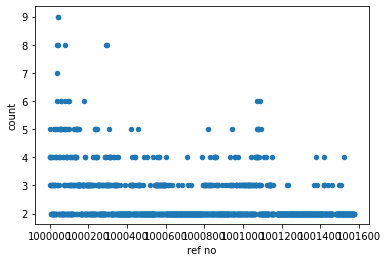

In [2]:
# create a subset sorted by ref no
dups_df_sorted = dups_df[[vp.REF_NO, vp.PUB_TITLE, vp.YEAR, vp.MONTH, vp.DAY, vp.F_LINE]].sort_values(
    by=[vp.REF_NO, vp.YEAR, vp.MONTH, vp.DAY])

# count the duplicates
dups_count = dups_df_sorted.groupby('ref no')['first line'].count()
dups_count_df = dups_count.to_frame().reset_index().rename(columns= {'first line': 'count'})
dups_count_df.plot(kind='scatter', x='ref no', y='count')
plot.show()

## Suspects

Show the individual (suspect) poems


In [3]:
singles = dups_count_df.query("count == 1")[vp.REF_NO]

dups_df.loc[dups_df[vp.REF_NO].isin(singles)][[vp.REF_NO, vp.PUB_TITLE, vp.YEAR, vp.F_LINE]].sort_values(vp.F_LINE)

,ref no,publication title,year,first line


## Matrix / heat map (all year)

This matrix / heatmap shows the number poems that were shared between publications. The score does not include the 
poem being republished by the same publication.

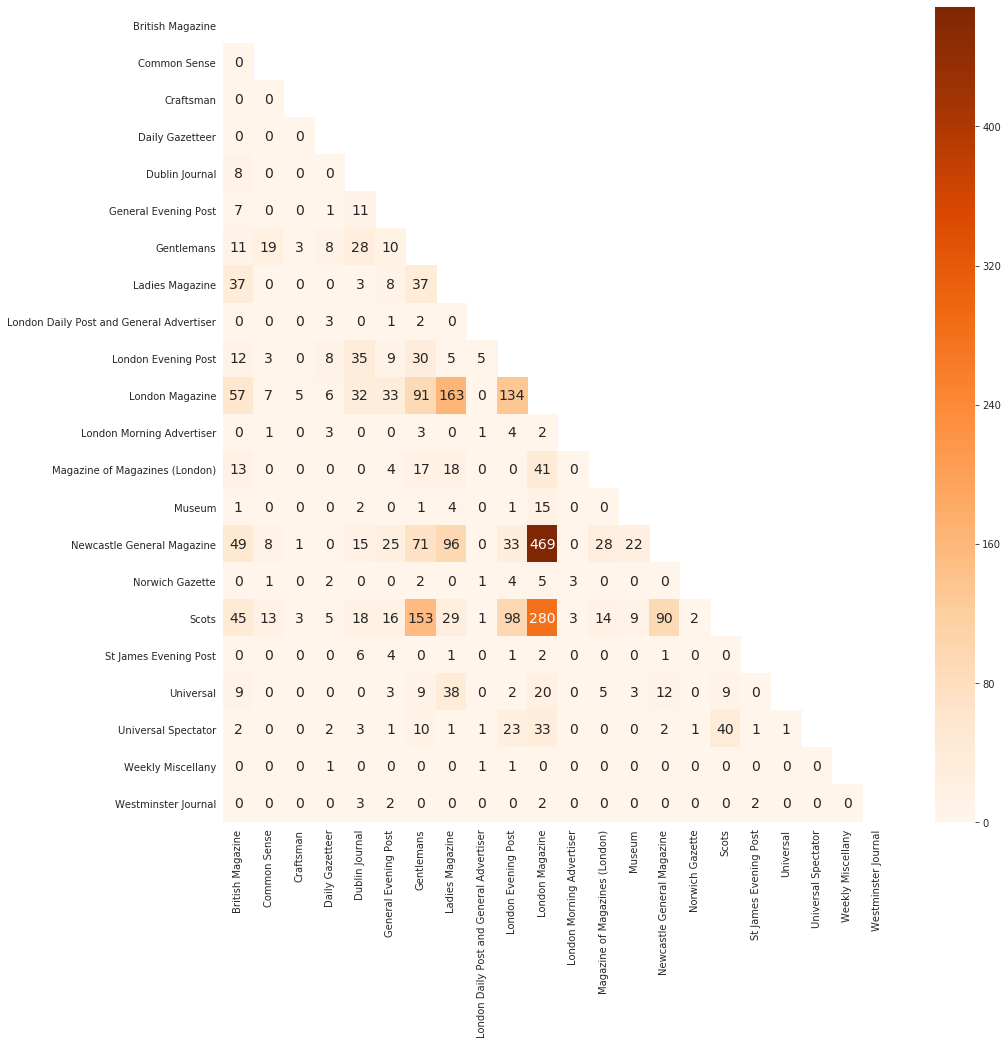

In [4]:
matrix = vp.create_publications_matrix(dups_df)
mask = np.zeros_like(matrix)
mask[np.triu_indices_from(mask)] = True
plot.figure(figsize=(15, 15))
with sn.axes_style("white"):
    sn.heatmap(matrix, mask=mask, cmap='Oranges', annot=True, fmt='g', annot_kws={'size':14})
plot.show()

## Matrix / heat map (by year)

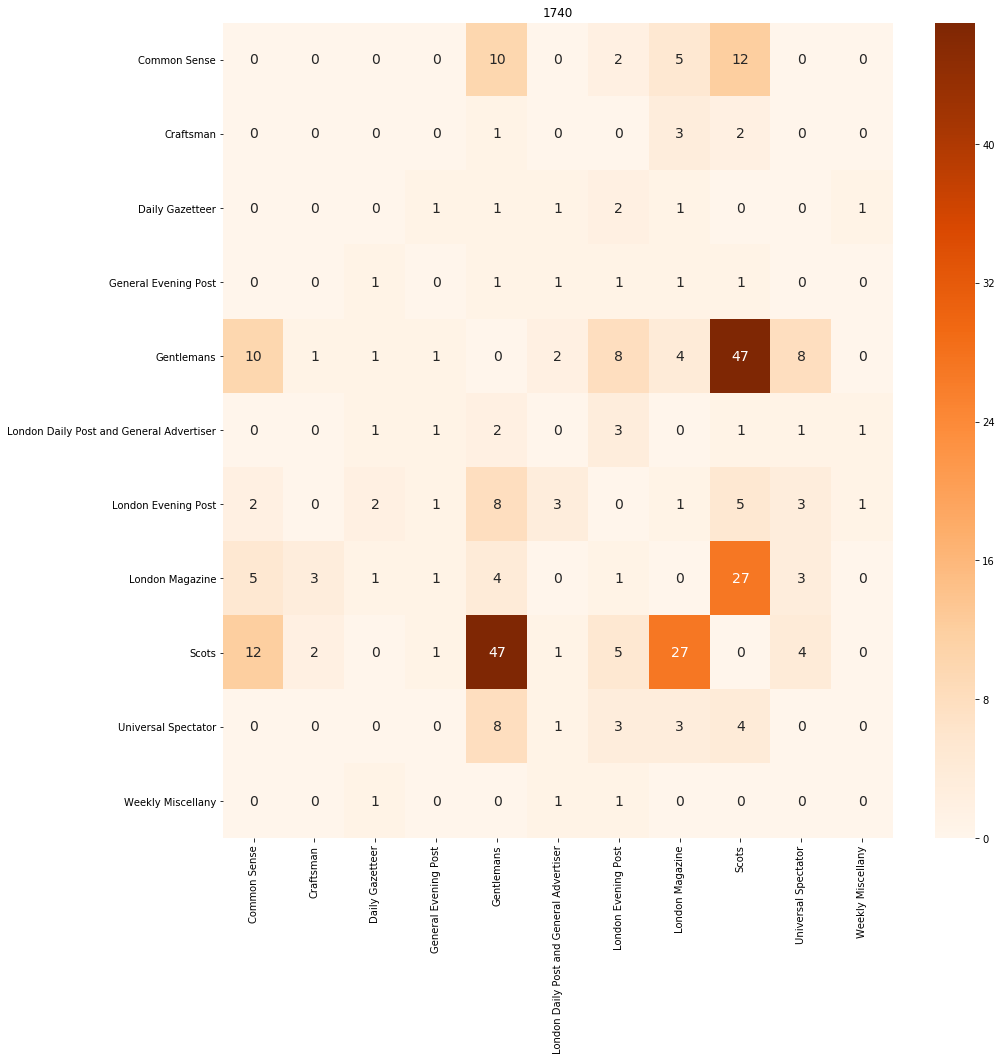

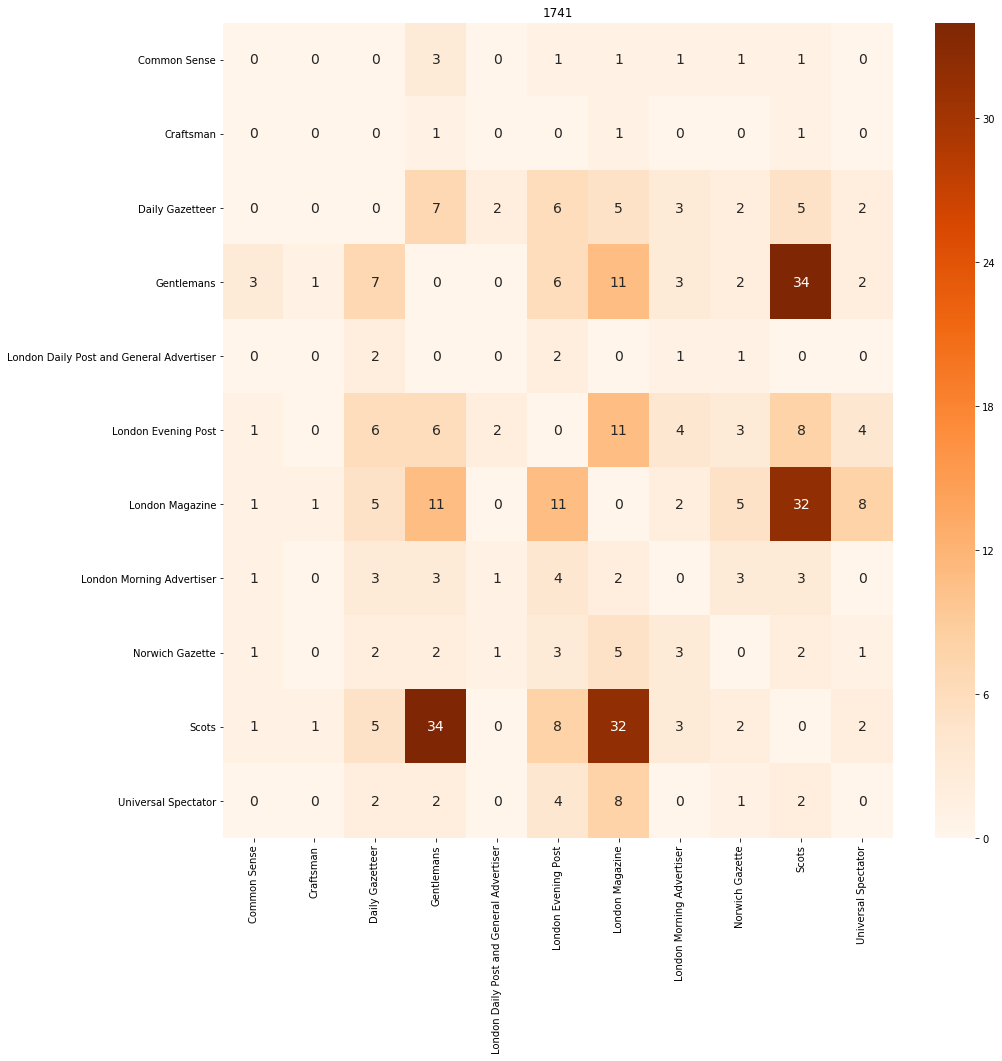

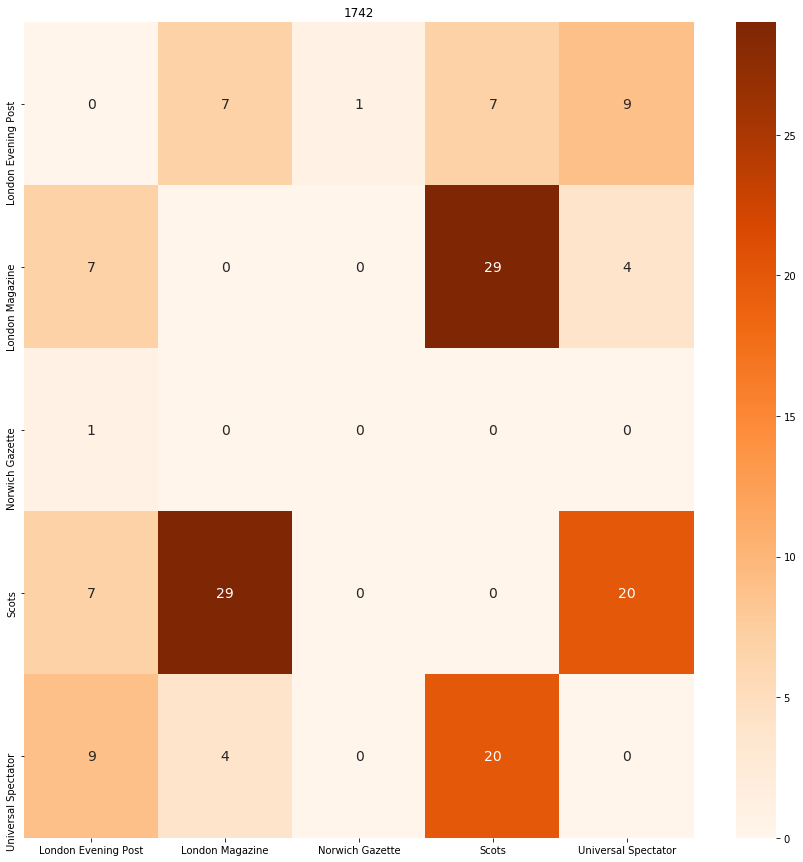

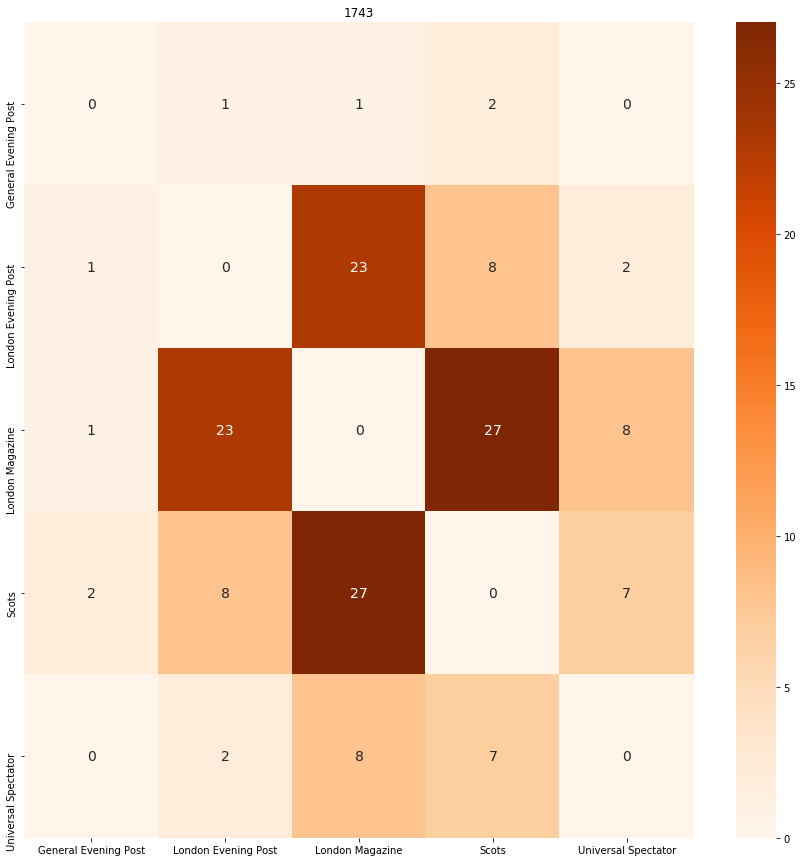

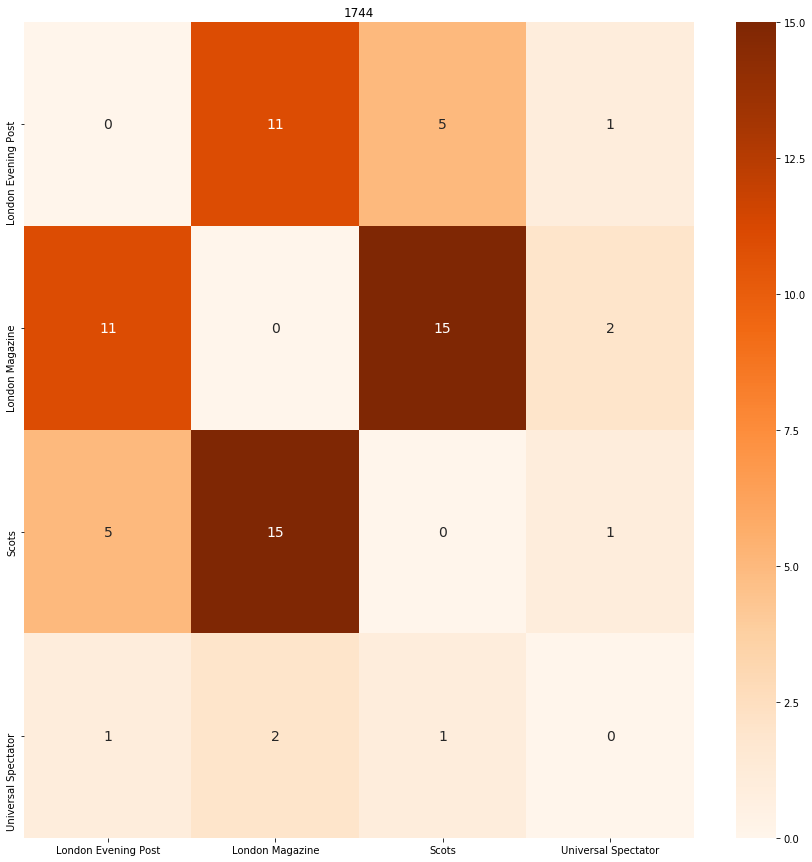

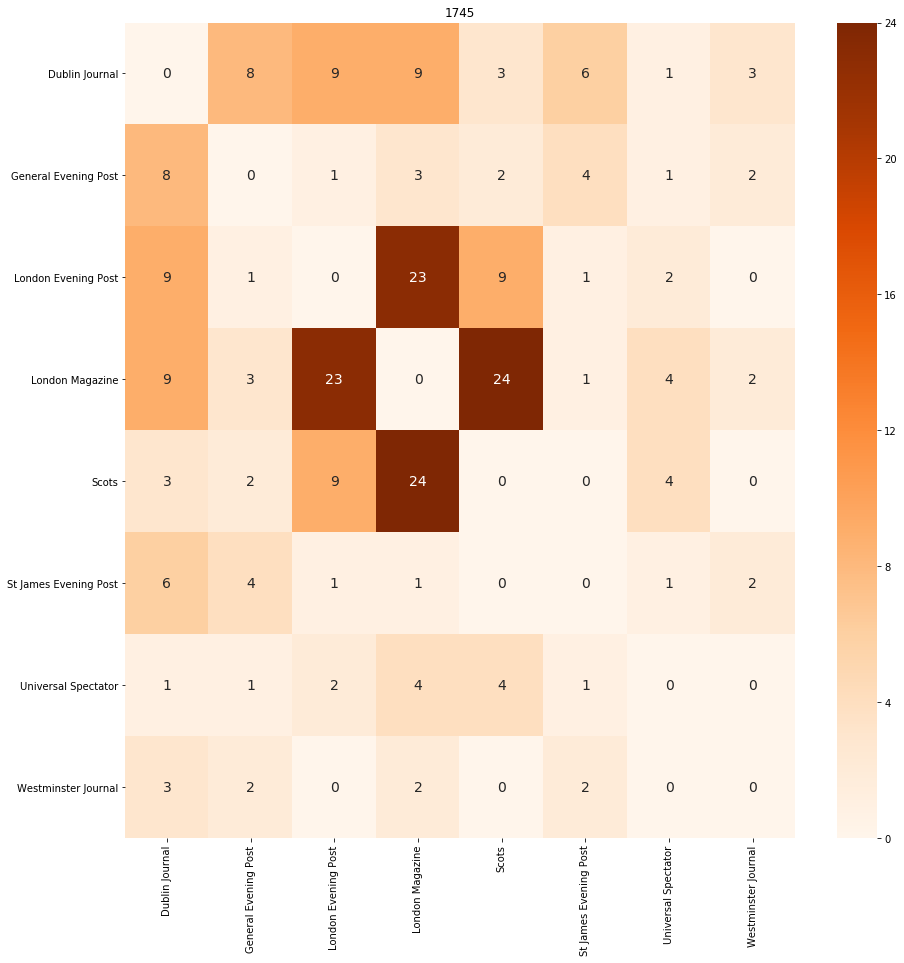

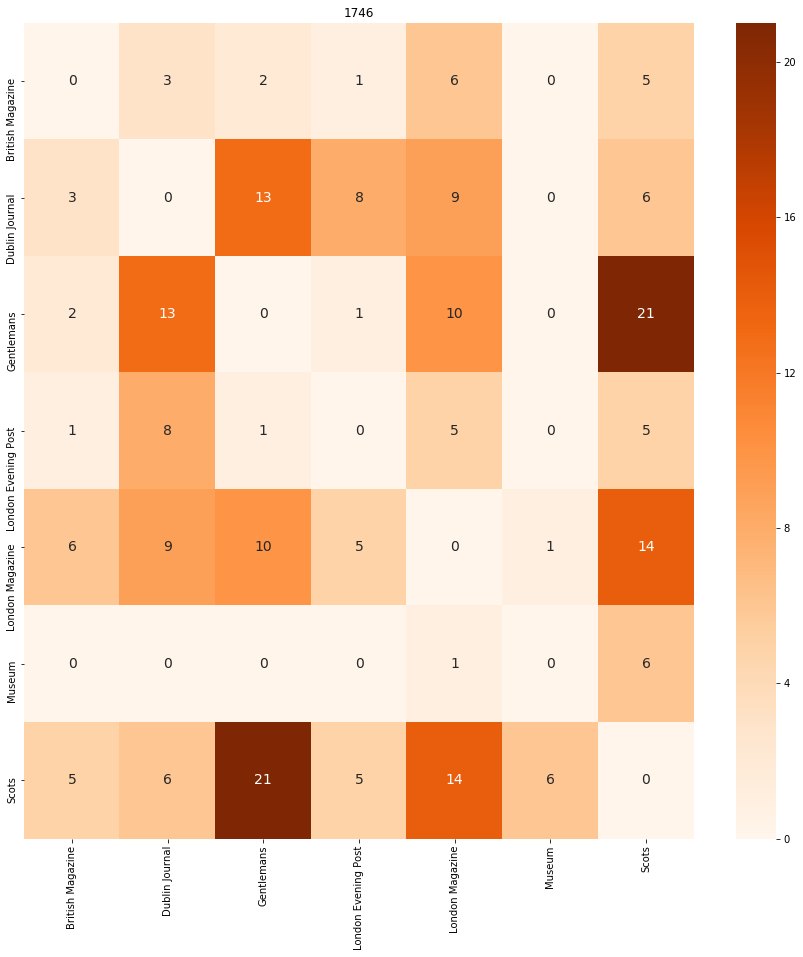

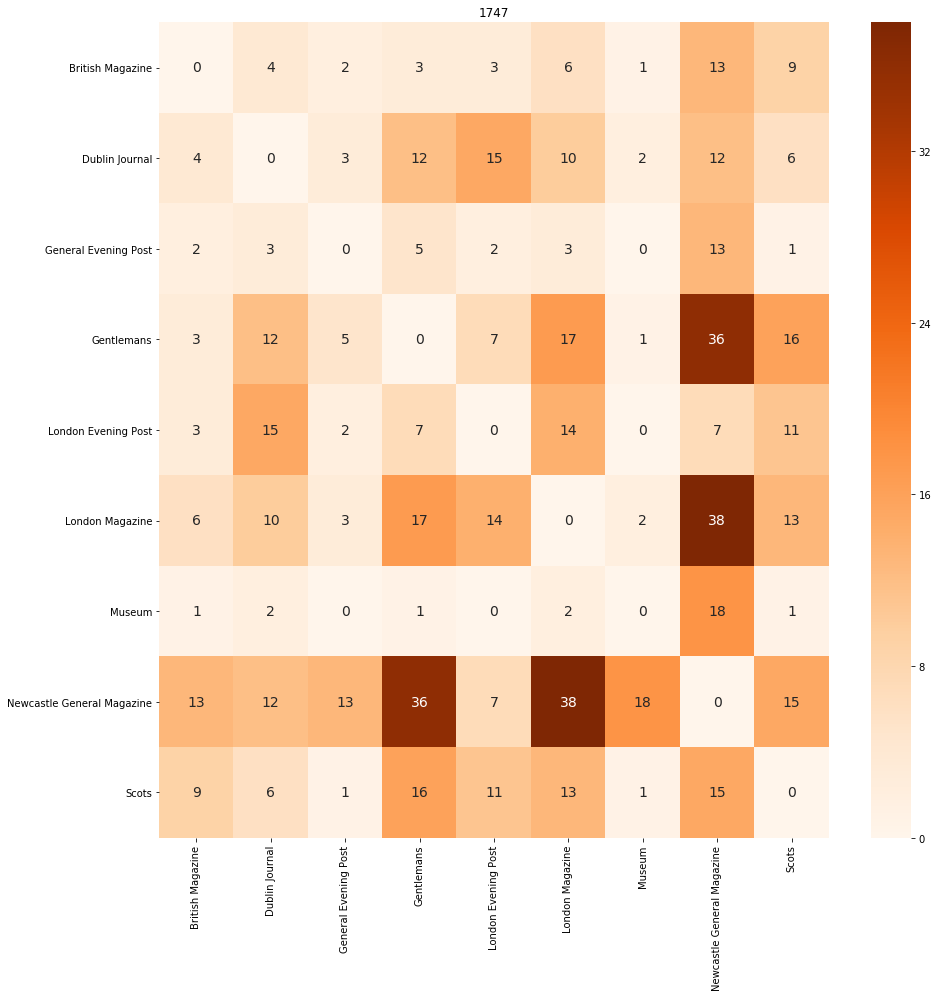

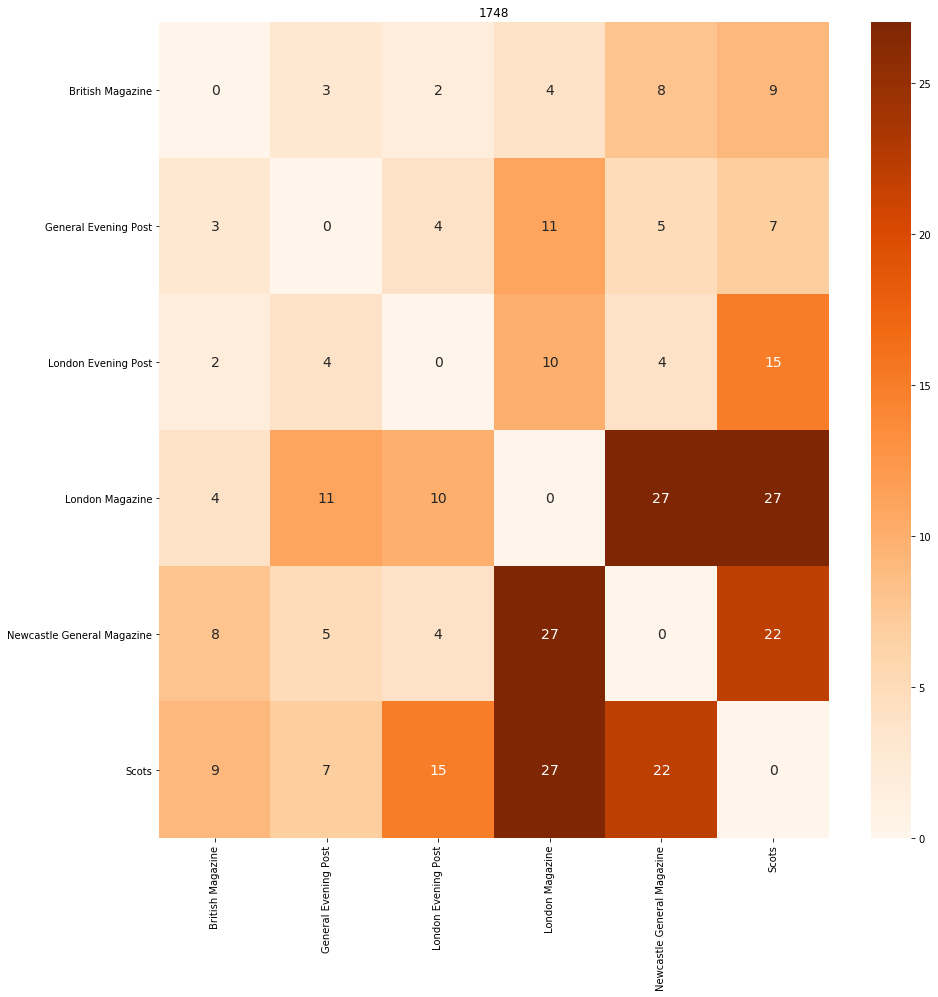

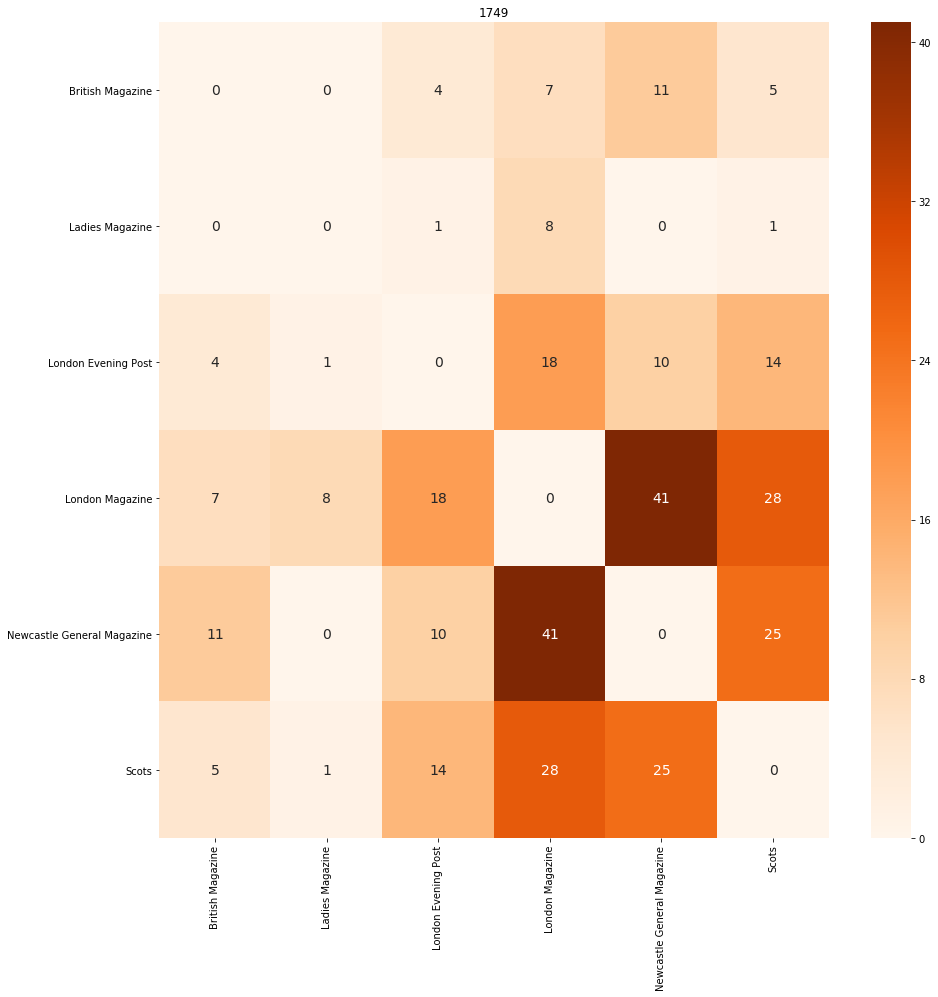

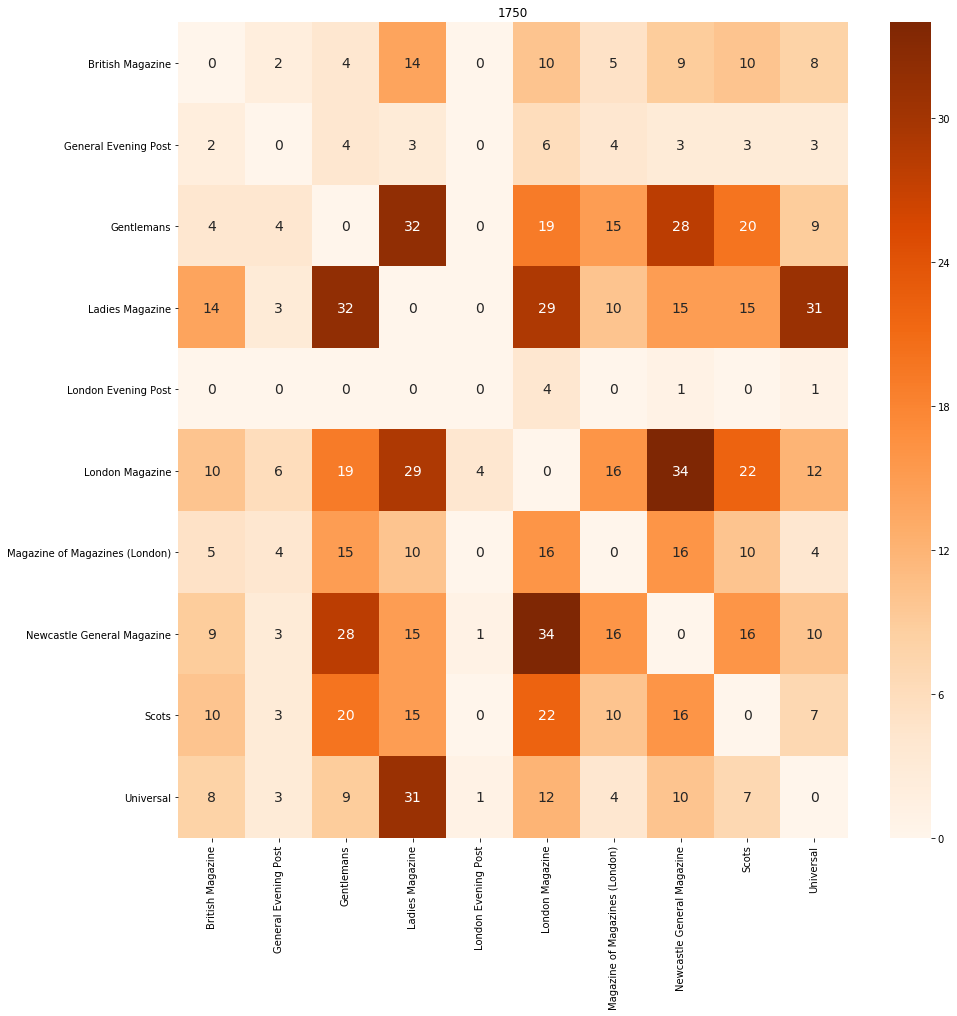

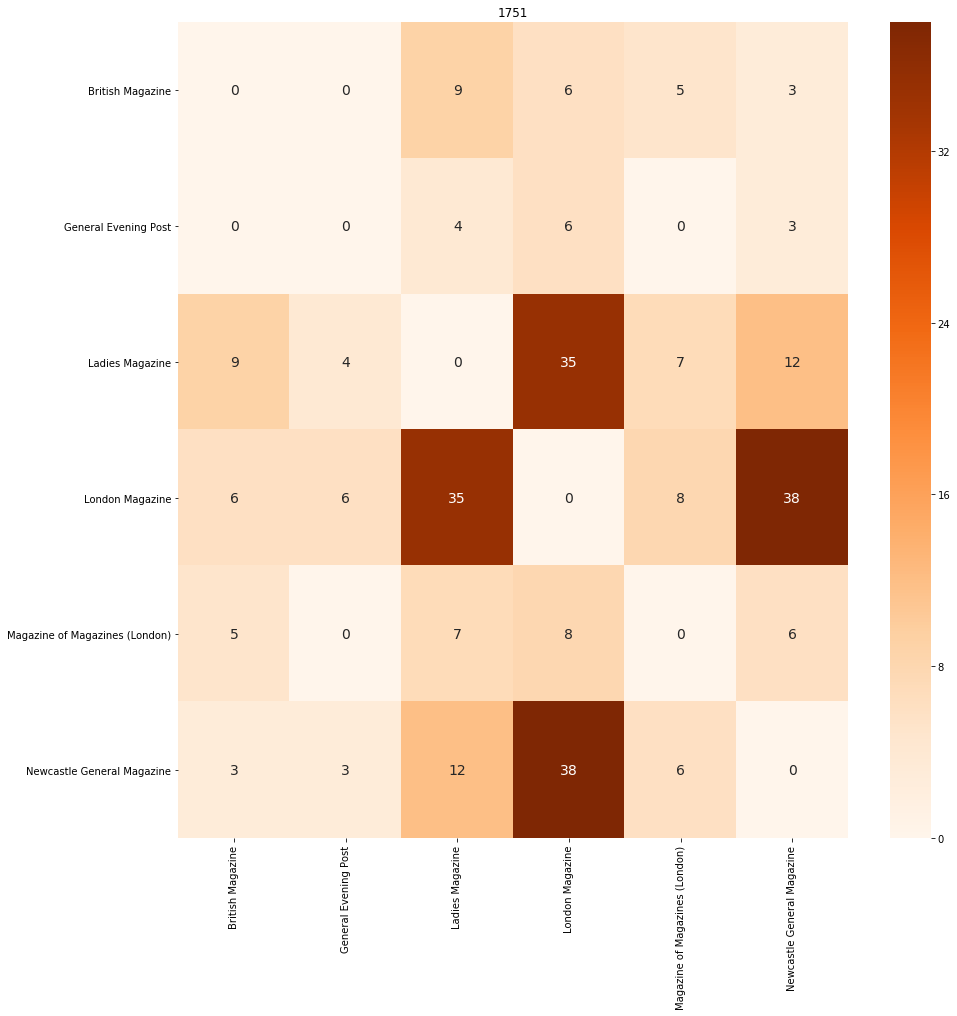

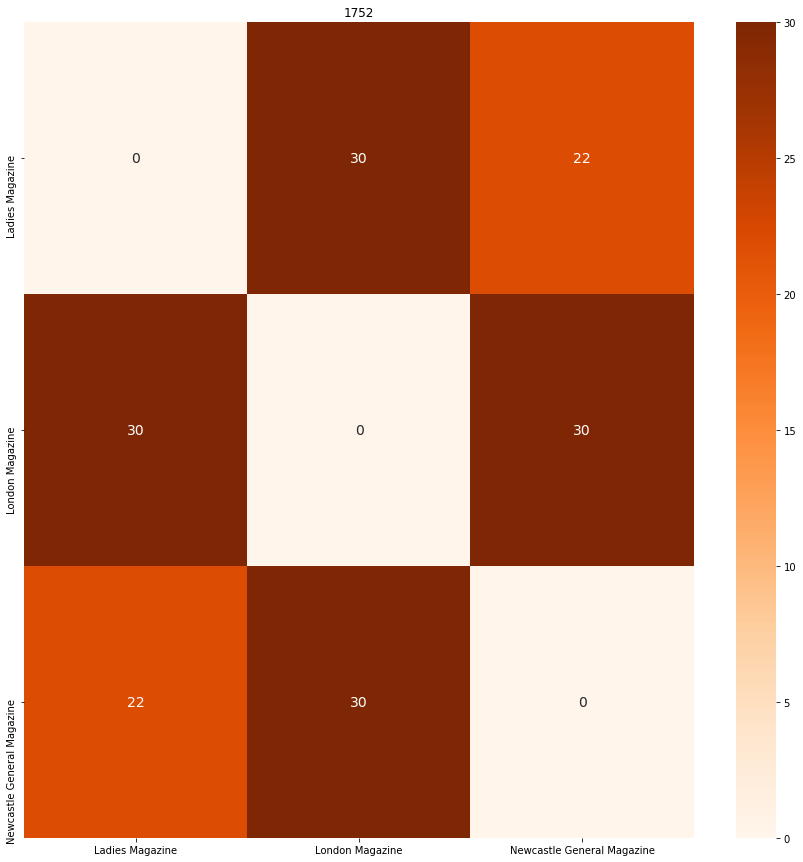

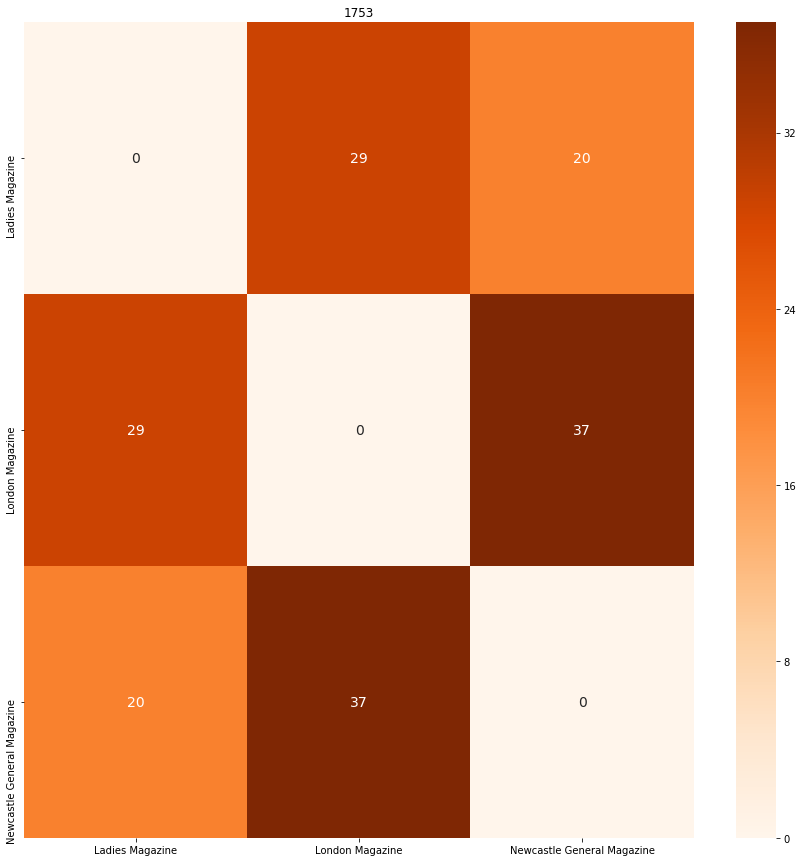

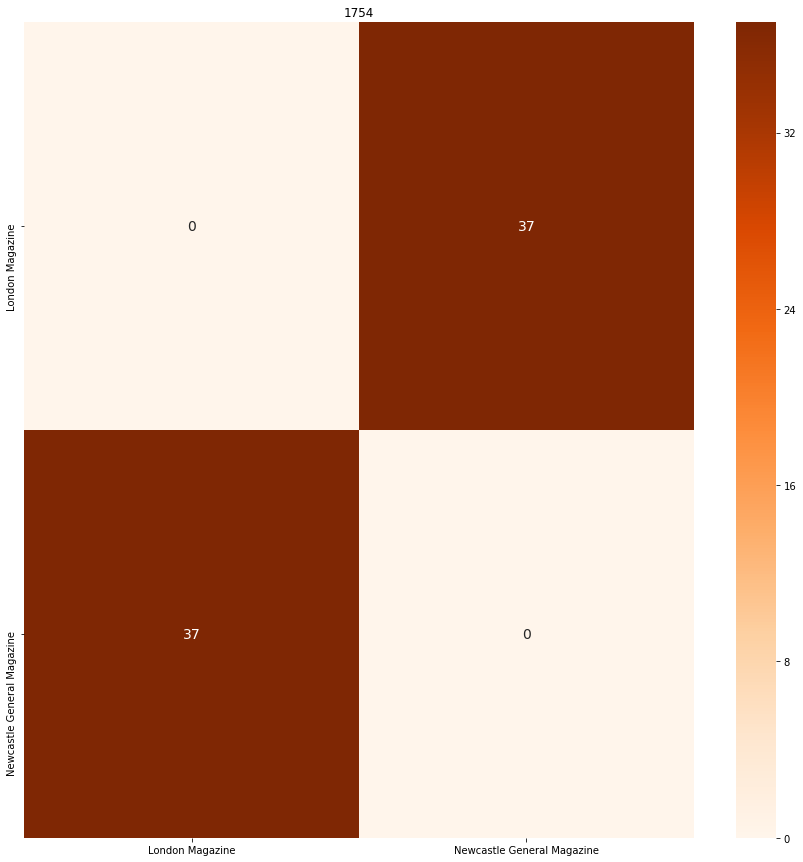

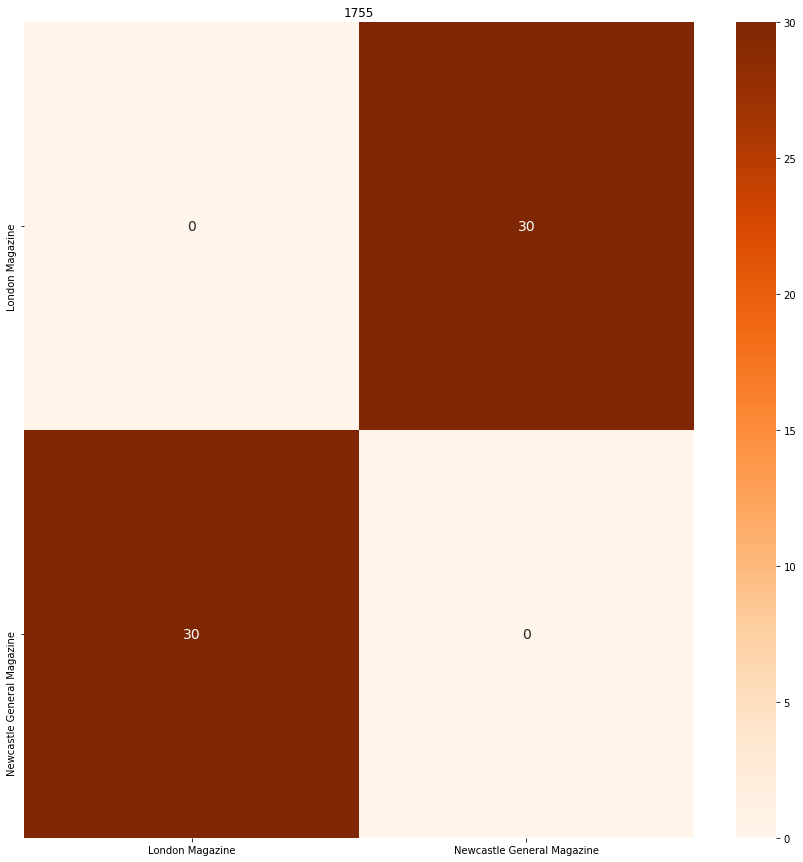

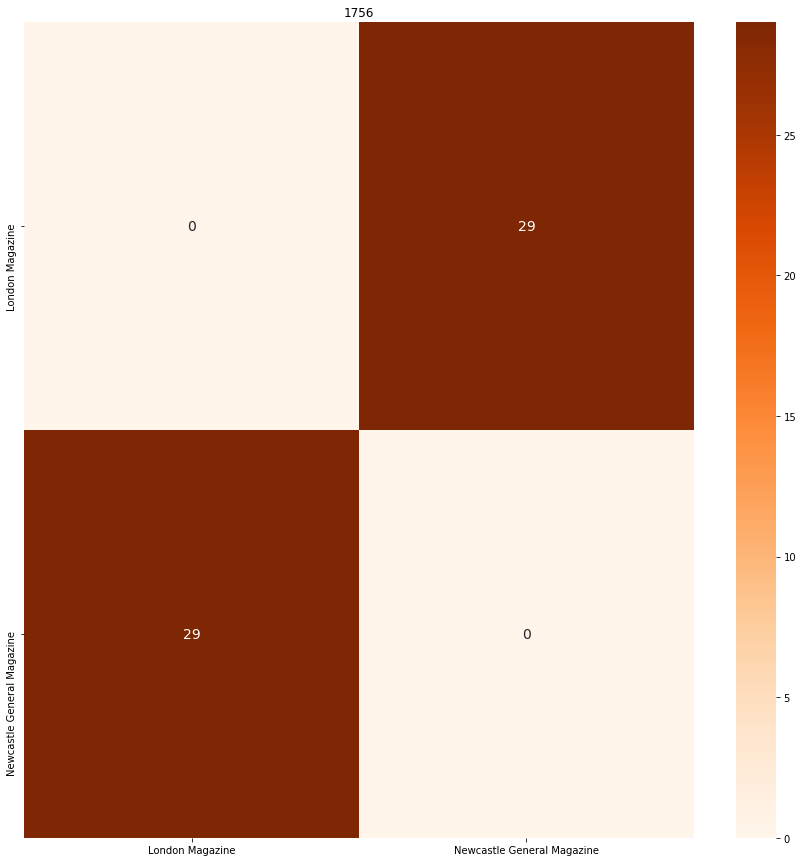

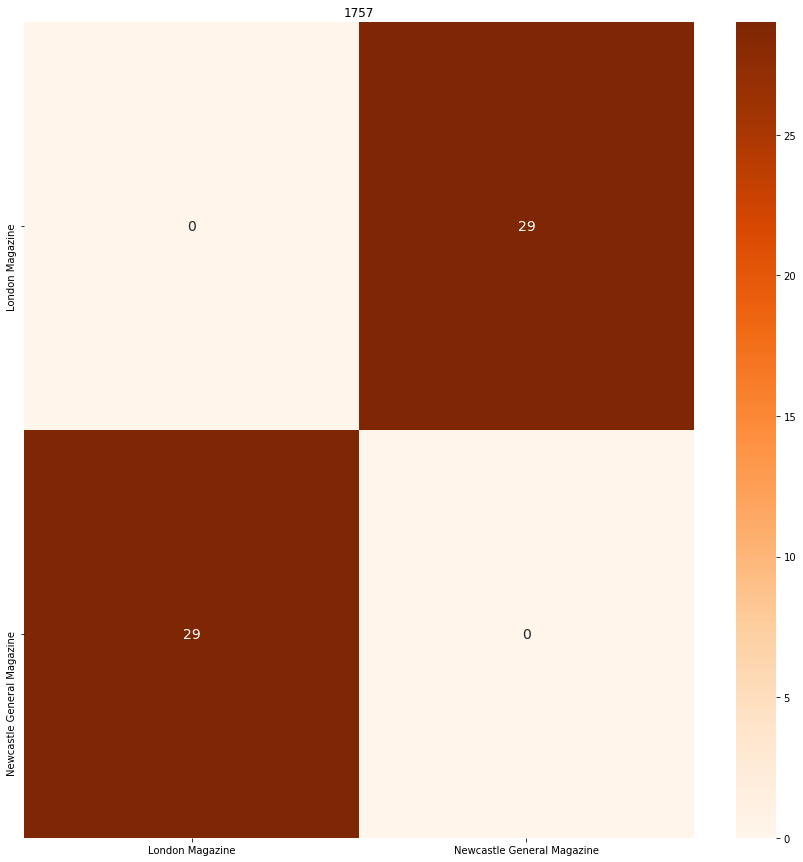

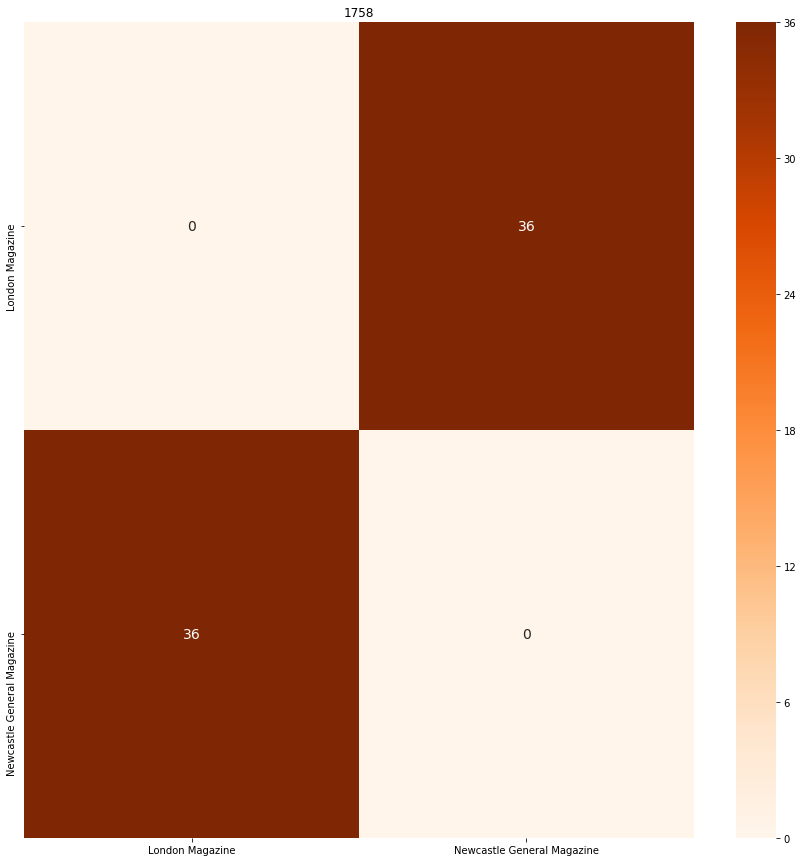

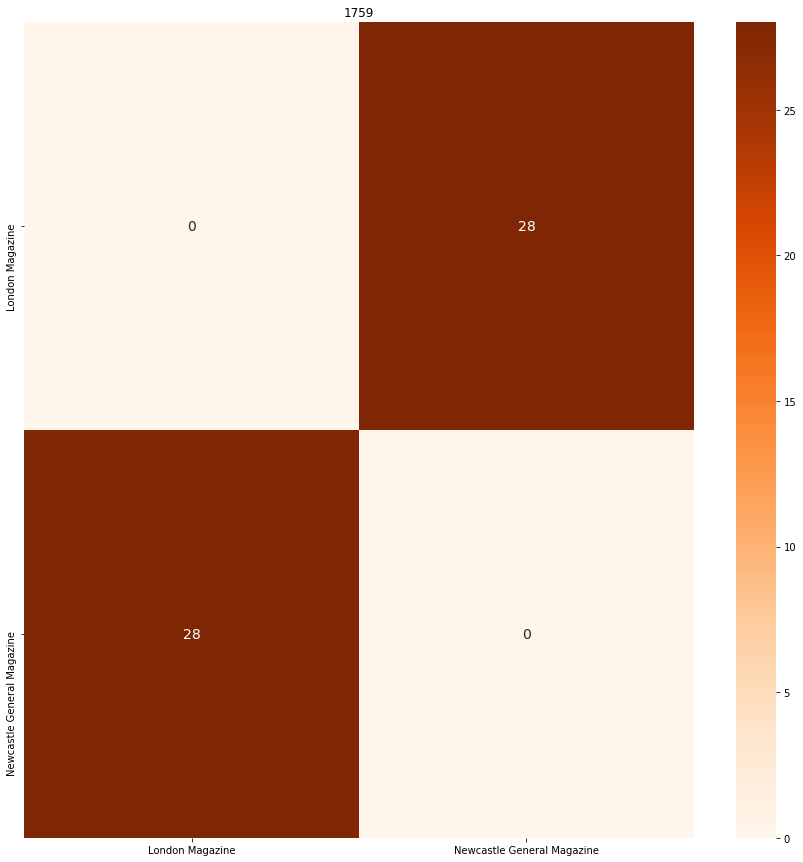

In [5]:
# start and end years
start_year = dups_df[vp.YEAR].min()
end_year = dups_df[vp.YEAR].max()

for year in np.arange(start_year, end_year):
    dups_year_df = dups_df[dups_df['year'] == year]
    if dups_year_df.size > 0:
        matrix = vp.create_publications_matrix(dups_year_df)

        plot.figure(figsize=(15, 15))
        plot.title(year)
        sn.heatmap(matrix, cmap='Oranges', annot=True, fmt='g', annot_kws={'size':14})
        plot.show()